In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
spotify_data = pd.read_csv('/content/spotify-data.csv')

In [ ]:
print(spotify_data.head())
print(spotify_data.shape)

   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   


In [ ]:
spotify_data = spotify_data.drop('Unnamed: 0',axis=1)
#spotify_data.drop_duplicates(subset=['track_id'],inplace=True)

In [ ]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

Text(0, 0.5, 'Frequency')

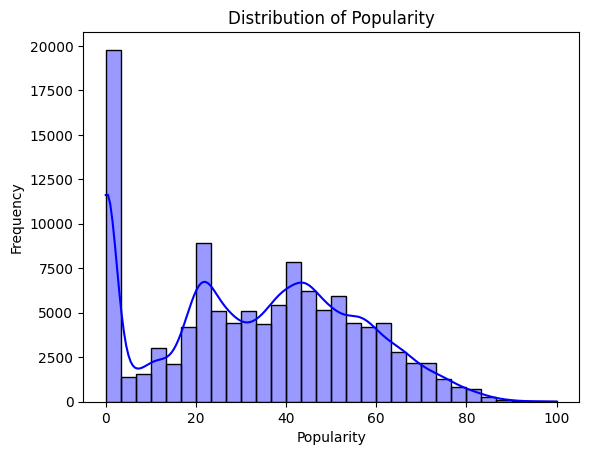

In [ ]:
sns.histplot(spotify_data['popularity'], kde=True, color='blue', alpha=0.4, bins=30)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')

In [ ]:
spotify_data_zeropop = spotify_data[spotify_data['popularity'] == 0]
spotify_data_smallpop = spotify_data[(spotify_data['popularity'] <= 1) & (spotify_data['popularity'] > 0)]
print(spotify_data_smallpop.describe())

       popularity   duration_ms  danceability       energy          key  \
count      2140.0  2.140000e+03   2140.000000  2140.000000  2140.000000   
mean          1.0  2.238182e+05      0.594905     0.678186     5.597664   
std           0.0  7.391446e+04      0.177526     0.223680     3.552359   
min           1.0  5.562600e+04      0.061900     0.001250     0.000000   
25%           1.0  1.806070e+05      0.476000     0.565000     2.000000   
50%           1.0  2.124130e+05      0.619000     0.731000     6.000000   
75%           1.0  2.478832e+05      0.735000     0.843000     9.000000   
max           1.0  1.482242e+06      0.938000     0.998000    11.000000   

          loudness         mode  speechiness  acousticness  instrumentalness  \
count  2140.000000  2140.000000   2140.00000   2140.000000       2140.000000   
mean     -7.108717     0.647664      0.07631      0.244960          0.067715   
std       4.226754     0.477810      0.06515      0.296673          0.209857   
min 

In [ ]:
print(spotify_data[spotify_data['popularity'] >= 98])

                     track_id                  artists  \
20001  3nqQXoyQOWXiESFLlDF1hG     Sam Smith;Kim Petras   
20008  4uUG5RXrOk84mYEfFvj3cK  David Guetta;Bebe Rexha   
30003  4uUG5RXrOk84mYEfFvj3cK  David Guetta;Bebe Rexha   
51664  2tTmW7RDtMQtBk7m2rYeSw         Bizarrap;Quevedo   
67356  5ww2BF9slyYgNOk37BlC4u            Manuel Turizo   
68303  5ww2BF9slyYgNOk37BlC4u            Manuel Turizo   
81051  3nqQXoyQOWXiESFLlDF1hG     Sam Smith;Kim Petras   
81210  4uUG5RXrOk84mYEfFvj3cK  David Guetta;Bebe Rexha   
88410  5ww2BF9slyYgNOk37BlC4u            Manuel Turizo   
89411  5ww2BF9slyYgNOk37BlC4u            Manuel Turizo   

                                  album_name  \
20001              Unholy (feat. Kim Petras)   
20008                        I'm Good (Blue)   
30003                        I'm Good (Blue)   
51664  Quevedo: Bzrp Music Sessions, Vol. 52   
67356                             La Bachata   
68303                             La Bachata   
81051              Unholy

In [ ]:
# After manually verifying the release dates of songs with 0 popularity, we discovered the majority of
# songs with 0 popularity were released very close to the time of data collection. We hypothesize these songs
# only have 0 popularity because they were released too soon from the time of data collection.
spotify_data = spotify_data[spotify_data['popularity'] != 0]

Text(0, 0.5, 'Frequency')

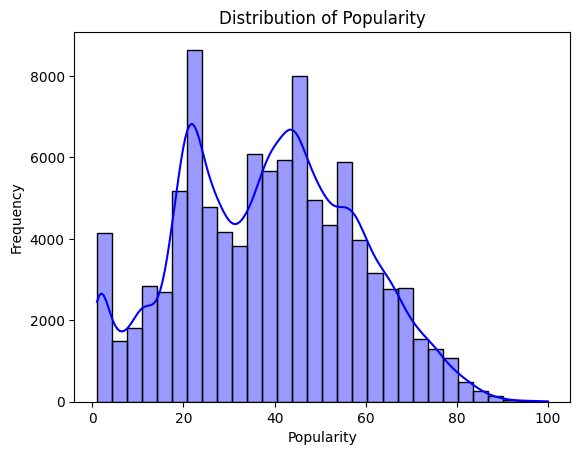

In [ ]:
sns.histplot(spotify_data['popularity'], kde=True, color='blue', alpha=0.4, bins=30)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')

In [ ]:
spotify_data = spotify_data[spotify_data['speechiness'] < 0.9]
spotify_data.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,97353.000000,9.735300e+04,97353.000000,97353.000000,97353.000000,97353.000000,97353.000000,97353.000000,97353.000000,97353.000000,97353.000000,97353.000000,97353.000000,97353.000000
mean,38.773936,2.303435e+05,0.565667,0.645409,5.307109,-8.242778,0.634156,0.080946,0.307548,0.165848,0.214544,0.469119,122.858781,3.908477
std,19.219110,1.103956e+05,0.173139,0.250735,3.554646,4.980984,0.481668,0.086976,0.328360,0.316821,0.191275,0.258990,29.898105,0.427053
min,1.000000,2.426600e+04,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1.756400e+05,0.456000,0.475000,2.000000,-10.014000,0.000000,0.035800,0.014400,0.000000,0.098300,0.254000,99.987000,4.000000
50%,39.000000,2.154060e+05,0.578000,0.687000,5.000000,-7.053000,1.000000,0.048800,0.163000,0.000065,0.132000,0.456000,122.953000,4.000000
75%,53.000000,2.652130e+05,0.693000,0.858000,8.000000,-5.018000,1.000000,0.084400,0.580000,0.077100,0.276000,0.676000,141.374000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.899000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [ ]:
# Getting rid of songs that are album fillers or too short to be 'hits'
spotify_data = spotify_data[spotify_data['duration_ms'] >= 40000]

In [ ]:
# Turning numerical variables that are really categorical variables into categorical variables
spotify_data['key'] = spotify_data['key'].astype(str)
spotify_data['mode'] = spotify_data['mode'].astype(str)
spotify_data['time_signature'] = spotify_data['time_signature'].astype(str)
spotify_data['explicit'] = spotify_data['explicit'].astype(int)

In [ ]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97184 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          97184 non-null  object 
 1   artists           97184 non-null  object 
 2   album_name        97184 non-null  object 
 3   track_name        97184 non-null  object 
 4   popularity        97184 non-null  int64  
 5   duration_ms       97184 non-null  int64  
 6   explicit          97184 non-null  int64  
 7   danceability      97184 non-null  float64
 8   energy            97184 non-null  float64
 9   key               97184 non-null  object 
 10  loudness          97184 non-null  float64
 11  mode              97184 non-null  object 
 12  speechiness       97184 non-null  float64
 13  acousticness      97184 non-null  float64
 14  instrumentalness  97184 non-null  float64
 15  liveness          97184 non-null  float64
 16  valence           97184 non-null  float

In [ ]:
df_num = spotify_data.select_dtypes(include = 'number')

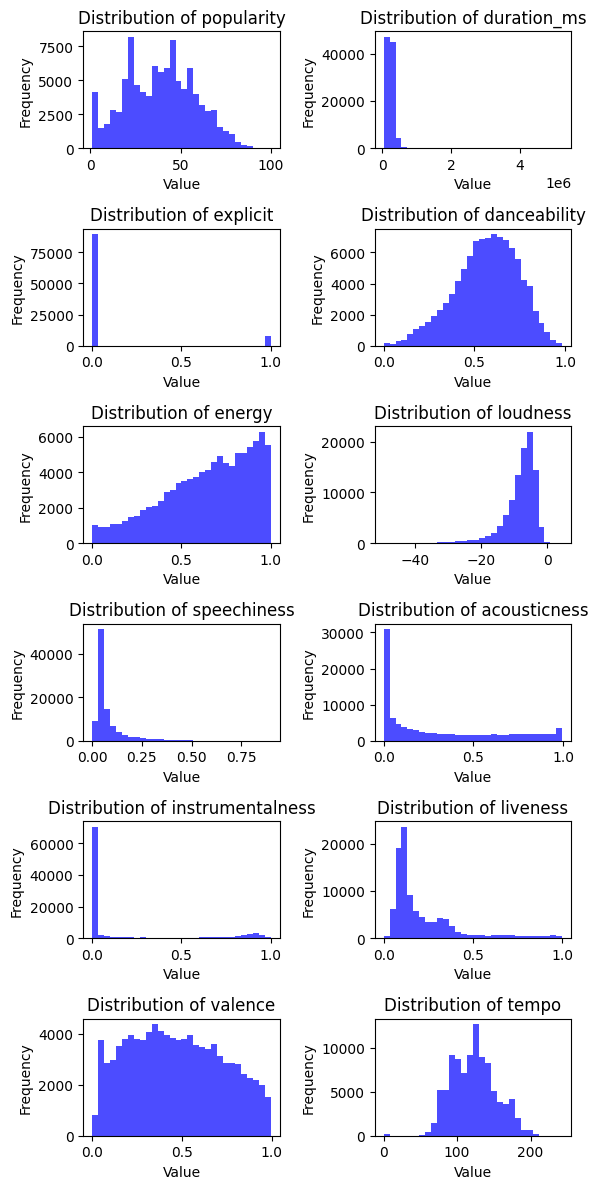

In [ ]:
def plot_numeric_distribution(dataframe):
    # Calculate the number of subplot rows, based on number of numeric columns
    num_plots = len(dataframe.columns)
    num_rows = num_plots // 2 + num_plots % 2
    plt.figure(figsize=(6, 2 * num_rows))

    # Subplots
    for index, column in enumerate(dataframe.columns):
        plt.subplot(num_rows, 2, index + 1)
        plt.hist(dataframe[column].dropna(), bins=30, color='blue', alpha=0.7)
        plt.title(f'Distribution of {column}')
        plt.xlabel('Value')
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()
plot_numeric_distribution(df_num)

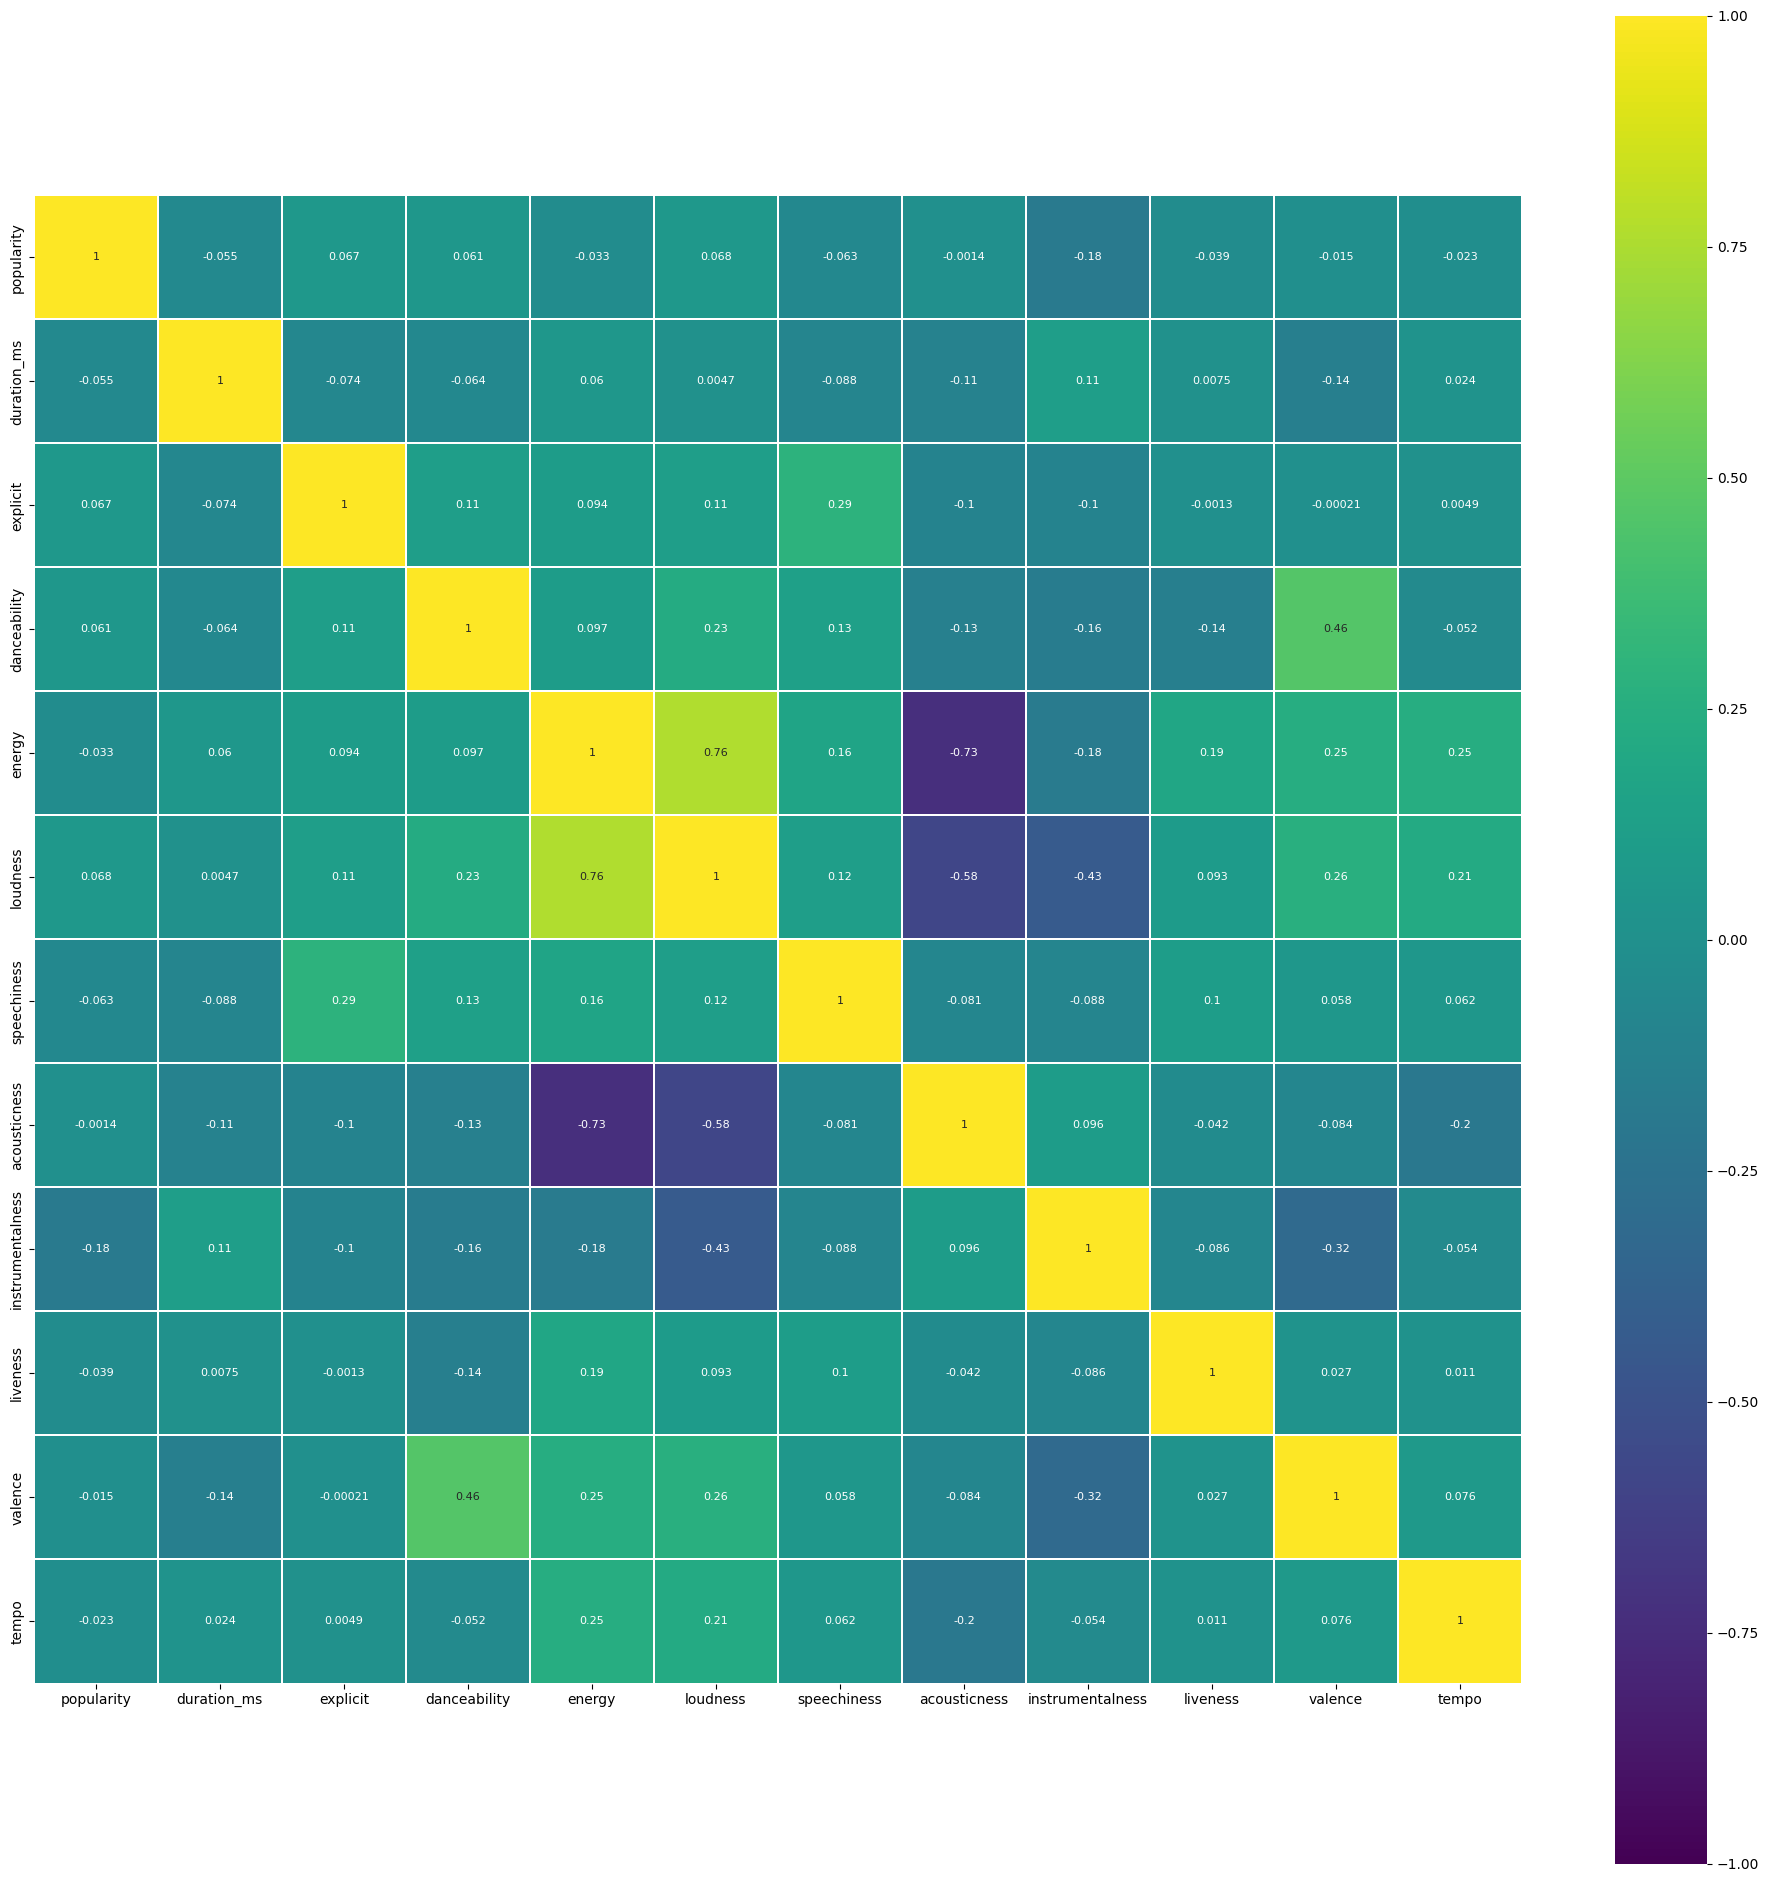

In [ ]:
df_corr = spotify_data.corr(numeric_only = True)
plt.figure(figsize=(24, 24))

sns.heatmap(df_corr,
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);


According to the correlation heatmap the feature most correlated with popularity is loudness, and the most negatively correlated is instrumentalness.

Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo'],
      dtype='object')


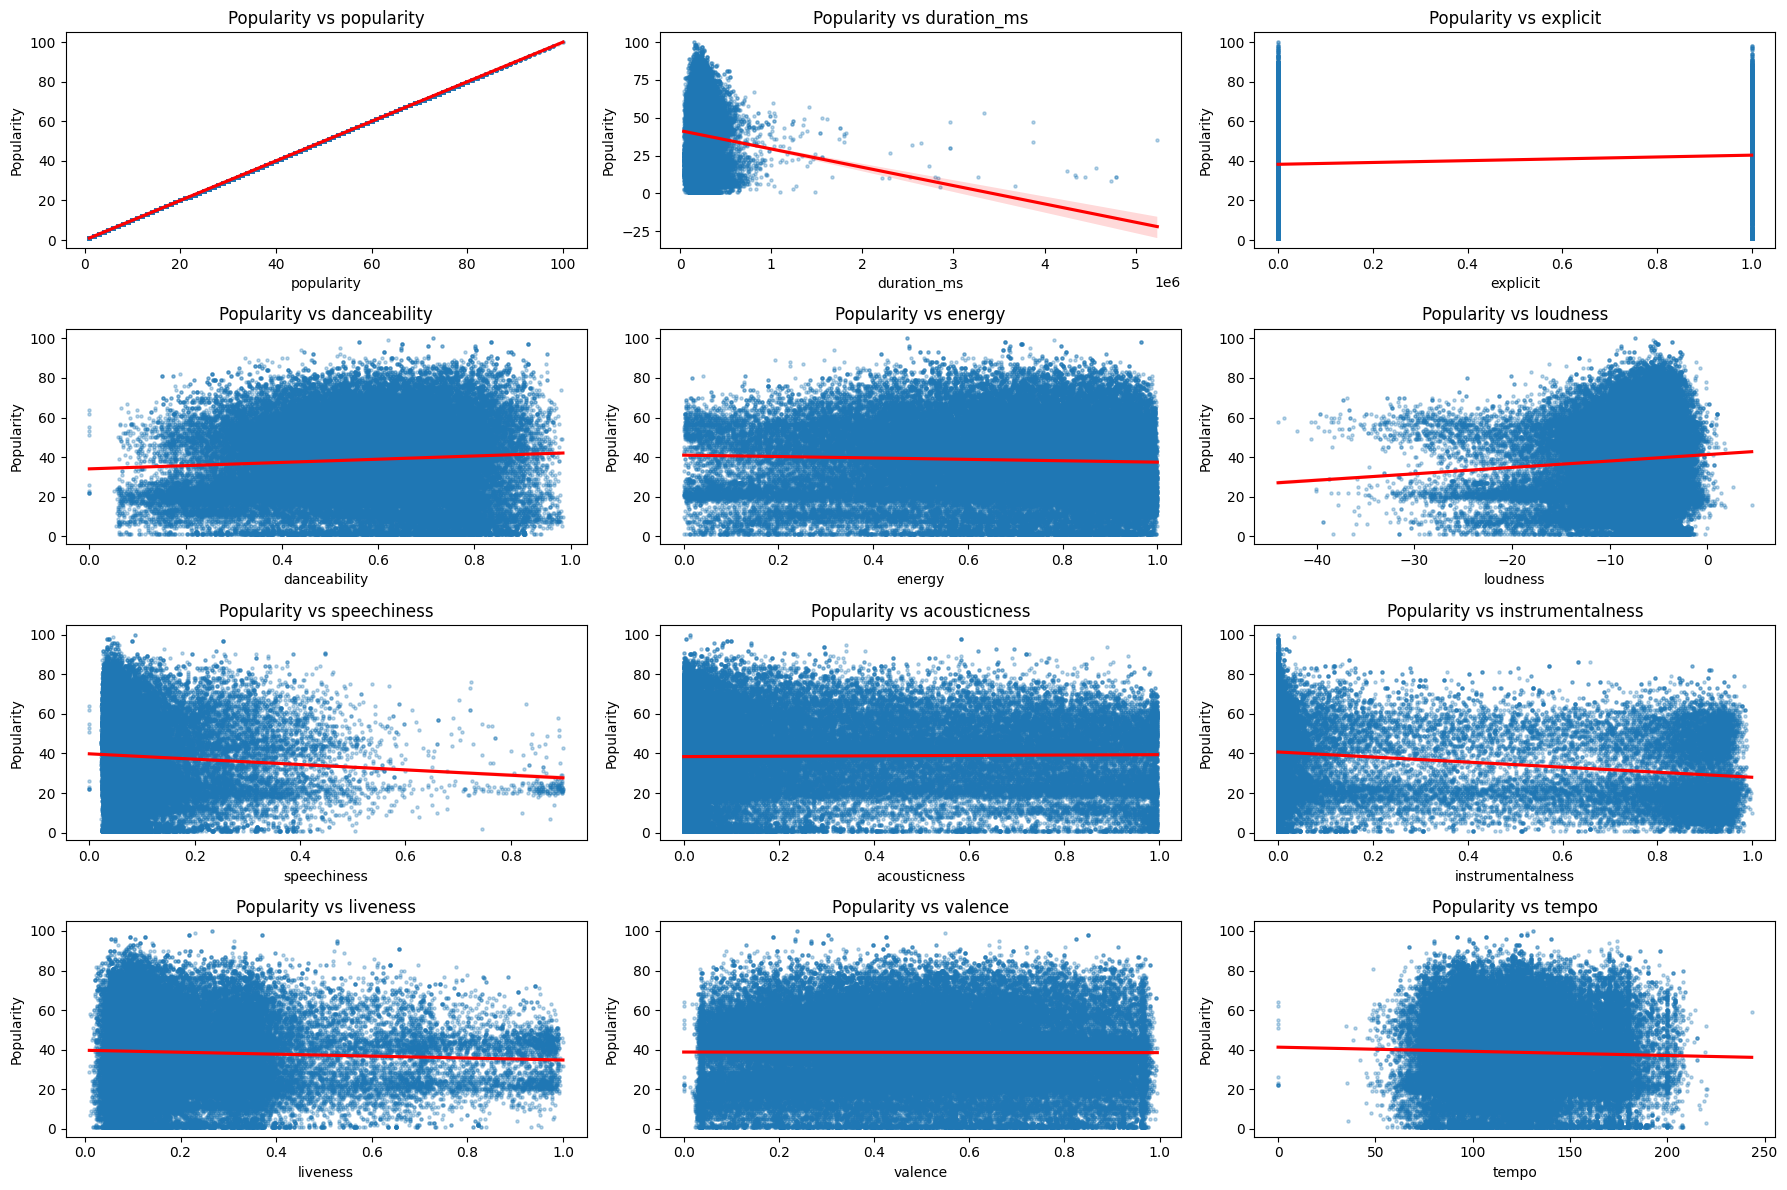

In [ ]:
print(df_num.columns)
feature_names = list(df_num.columns)
num_rows = round(len(feature_names) / 3) + (len(feature_names) % 3 > 0)  # Ensure there's an extra row if needed
fig, axs = plt.subplots(num_rows, 3, figsize=(18, 12))

# Flatten the array of axes
axs = axs.flatten()

# Scatter plot
scatter_options = {
    's': 5,  # size of scatter points
    'alpha': 0.3  # transparency of scatter points
}

# Regression line
line_options = {
    'color': 'red'
}

for i, feature in enumerate(feature_names):
  if feature != 'popularity':
    ax = axs[i]
    sns.regplot(x=feature, y='popularity', data=df_num, ax=ax, scatter_kws=scatter_options, line_kws=line_options)
    ax.set_title(f"Popularity vs {feature}")
    ax.set_ylabel('Popularity')
    ax.set_xlabel(feature)

# Remove empty subplots in the last row if number of features not a multiple of 3
for i in range(len(feature_names), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

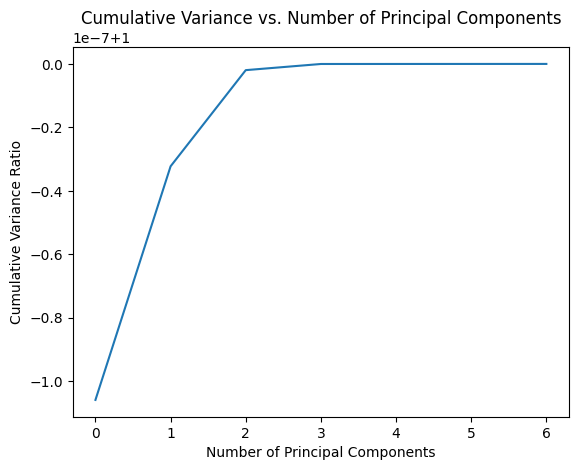

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=7)
pca.fit(df_num)
df_pca = pca.transform(df_num)

variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(variance_ratio)
plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Ratio')
plt.title('Cumulative Variance vs. Number of Principal Components')
plt.show()

In [ ]:
spotify_data['popular'] = (spotify_data['popularity'] / 100) >= 0.60
spotify_data['popular'] = spotify_data['popular'].astype(int)
numeric_features = spotify_data.select_dtypes(include=['float64', 'int64']).drop(columns=['popularity'])

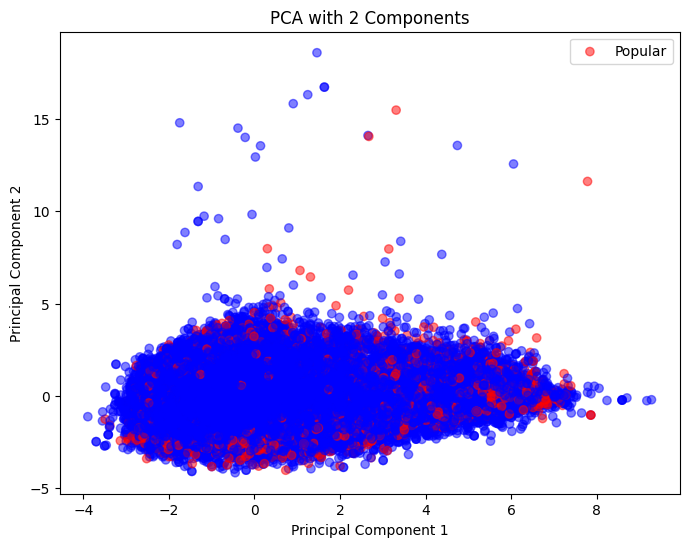

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_features)

# PCA
pca = PCA(n_components=5)
pca_components = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2','PC3','PC4','PC5'])
pca_df['popular'] = numeric_features['popular']
colors = ['red' if x == 1 else 'blue' for x in pca_df['popular']]

# Plotting
plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5,c=colors)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA with 2 Components')
plt.legend(labels=['Popular','Not popular'])
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score

y = spotify_data['popular']
X = numeric_features.drop(columns=['popular'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

Accuracy: 0.8475587796470648
Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92     16474
           1       0.00      0.00      0.00      2963

    accuracy                           0.85     19437
   macro avg       0.42      0.50      0.46     19437
weighted avg       0.72      0.85      0.78     19437

Confusion matrix:
 [[16474     0]
 [ 2963     0]]
F1 score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Due to imbalanced proportion of popular songs, we will need to check if under or oversampling can help fix our logistic regression model.

Random over sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
X = numeric_features.drop('popular', axis=1)
y = numeric_features['popular']

ros = RandomOverSampler(random_state=42)
X_oversampled, y_oversampled = ros.fit_resample(X, y)
print(sorted(Counter(y_oversampled).items()))

[(0, 82362), (1, 82362)]


Smote over sampling:

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
X_smote, y_smote = SMOTE().fit_resample(X, y)
print(sorted(Counter(y_smote).items()))

[(0, 82362), (1, 82362)]


Random under sampling:

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0, replacement=True)
X_undersampled, y_undersampled = rus.fit_resample(X, y)
print(sorted(Counter(y_undersampled).items()))

[(0, 14822), (1, 14822)]


Logistic regression, random oversampling:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.4987403247837305
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67     16431
           1       0.00      0.00      0.00     16514

    accuracy                           0.50     32945
   macro avg       0.25      0.50      0.33     32945
weighted avg       0.25      0.50      0.33     32945



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic regression w/ SMOTE:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test,y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion matrix:\n",confusion_matrix)

Accuracy: 0.4987403247837305
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67     16431
           1       0.00      0.00      0.00     16514

    accuracy                           0.50     32945
   macro avg       0.25      0.50      0.33     32945
weighted avg       0.25      0.50      0.33     32945

Confusion matrix:
 [[16431     0]
 [16514     0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Undersampling:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_undersampled, y_undersampled, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.5073368190251307
Classification Report:
               precision    recall  f1-score   support

           0       0.51      1.00      0.67      3008
           1       0.00      0.00      0.00      2921

    accuracy                           0.51      5929
   macro avg       0.25      0.50      0.34      5929
weighted avg       0.26      0.51      0.34      5929



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random oversampling, random undersampling, and SMOTE oversampling do not fix our logistic regression model. Based on the above results where logistic regression only predicts songs to be unpopular, we believe logistic regression to be a poor choice for this task due to the number of popular songs being restricted relative to the population. Therefore we will only proceed with random forest classifier, which does a much better job of explaining the data. We will proceed now with naive bayes classification.

Naive bayes:

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y = spotify_data['popular']
X = numeric_features.drop(columns=['popular'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
y_pred2 = pd.Series(y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion matrix:\n", confusion_matrix(y_test,y_pred2))

Accuracy: 0.7761485826001955
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87     16474
           1       0.29      0.32      0.30      2963

    accuracy                           0.78     19437
   macro avg       0.58      0.59      0.58     19437
weighted avg       0.79      0.78      0.78     19437

Confusion matrix:
 [[14148  2326]
 [ 2025   938]]


The above results show troubling signs because there are more false negatives and false positives than true negatives, and it is worse than our baseline model of ~85% accuracy

Naive bayesw/ SMOTE over sampling

In [ ]:
# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_smote)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_smote, test_size=0.2, random_state=42)

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion matrix:\n", confusion_matrix(y_test,y_pred))

Accuracy: 0.6319623615116102
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.45      0.55     16431
           1       0.60      0.81      0.69     16514

    accuracy                           0.63     32945
   macro avg       0.65      0.63      0.62     32945
weighted avg       0.65      0.63      0.62     32945

Confusion matrix:
 [[ 7381  9050]
 [ 3075 13439]]


SMOTE seems to overcorrect for the imbalanced class and it hurts its ability to predict the right class

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

y = spotify_data['popular']
X = numeric_features.drop(columns=['popular'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random forest:

In [ ]:
## DONT RUN - Takes long time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

rf_classifier = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100,150],  # Number of trees in the forest.
    'min_samples_split': [2,3],  # Minimum number of samples required to split a node.
    'min_samples_leaf': [2,3,4],  # Minimum number of samples required at each leaf node.
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Parameters found: ", grid_search.best_params_)

# Best model found by GridSearchCV to predict on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy of the best model:", accuracy)
print("Classification Report of the best model:\n", classification_rep)
print("Confusion matrix:\n", confusion_matrix(y_test,y_pred))


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters found:  {'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy of the best model: 0.8742533794404276
Classification Report of the best model:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     13892
           1       0.58      0.02      0.04      2013

    accuracy                           0.87     15905
   macro avg       0.73      0.51      0.49     15905
weighted avg       0.84      0.87      0.82     15905

Confusion matrix:
 [[13858    34]
 [ 1966    47]]


Results above show that the accuracy with grid search is no better than the default values provided by RandomForestClassifier function

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
importances = rf_classifier.feature_importances_

In [ ]:
print("Accuracy:", accuracy)
print("Classification Report:\n",classification_rep)
print("Confusion matrix:\n", confusion_matrix(y_test,y_pred))

Accuracy: 0.9207696661007357
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96     16474
           1       0.93      0.52      0.67      2963

    accuracy                           0.92     19437
   macro avg       0.93      0.76      0.81     19437
weighted avg       0.92      0.92      0.91     19437

Confusion matrix:
 [[16363   111]
 [ 1429  1534]]


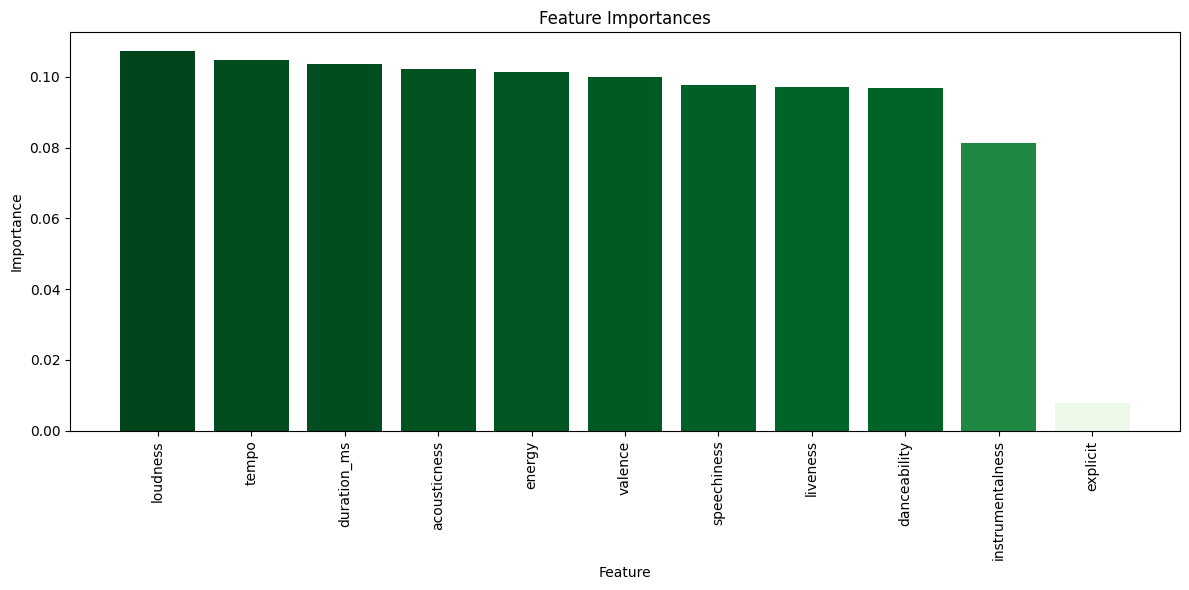

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

feature_names = numeric_features.columns
sorted_indices = np.argsort(importances)[::-1]
colors = plt.cm.Greens(importances[sorted_indices] / max(importances[sorted_indices]))

# Barchart of feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[sorted_indices], align='center',color=colors)
plt.xticks(range(X.shape[1]), feature_names[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.tight_layout()

plt.show()

In [ ]:
# Goal: Make new-releases data look like x_test
import json
new_releases = pd.read_csv('/content/new_tracks_data_final2.csv')

json_file_path = '/content/explicit-duration-info.json'
with open(json_file_path, 'r') as file:
    tracks_info = json.load(file)

for track in tracks_info:
    track['explicit'] = int(track['explicit'])

json_df = pd.DataFrame(tracks_info)
json_df.drop_duplicates(inplace=True)

# Merge the JSON data with the original data
merged_df = new_releases.merge(json_df, on='id', how='left')
print(merged_df)

# Selecting and reordering the columns to match the test set
selected_columns = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','duration_ms','explicit']
reshaped_data = merged_df[selected_columns]
desired_order = ['duration_ms', 'explicit', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
reshaped_data = reshaped_data.loc[:, desired_order]

reshaped_data.head()

                         id                name  \
0    4DYVmGdpglpFoq1YyawFCl  What Am I Gonna Do   
1    3SxziSDtYW5DVM3KxVot9Y        South Dakota   
2    13CG7pABtW9ZgttdS49935               Trust   
3    7gf5ffmSqKQBDnkmSe2Dt7    It Takes A Woman   
4    4Jn2CdZYqtIsPpIRYB1o47            The Fire   
..                      ...                 ...   
406  1JLm75SF5Q9RxxJnGePMPM           No Llores   
407  6LfbFy85IMwbkZG3BkYFN7            Lamentos   
408  78fb8fDcnCO0GR2w5Ivtp7   Tango De Crueldad   
409  7MfgLIYNXu1mfwxUTn6f52      La Próxima Vez   
410  5yZF5BdTmtdQitz89YBMYL              Yarará   

                                      uri  \
0    spotify:track:4DYVmGdpglpFoq1YyawFCl   
1    spotify:track:3SxziSDtYW5DVM3KxVot9Y   
2    spotify:track:13CG7pABtW9ZgttdS49935   
3    spotify:track:7gf5ffmSqKQBDnkmSe2Dt7   
4    spotify:track:4Jn2CdZYqtIsPpIRYB1o47   
..                                    ...   
406  spotify:track:1JLm75SF5Q9RxxJnGePMPM   
407  spotify:track:6LfbFy85

,duration_ms,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,181680,0,0.620,0.514,-9.204,0.0306,0.3840,0.000791,0.109,0.445,125.602
1,281853,0,0.667,0.382,-10.934,0.0267,0.0419,0.277000,0.307,0.629,75.776
2,203400,0,0.511,0.292,-11.161,0.0308,0.7310,0.000000,0.201,0.532,173.053
3,246986,0,0.576,0.143,-12.790,0.0419,0.7120,0.000164,0.140,0.214,115.806
4,225026,0,0.558,0.440,-15.823,0.0290,0.8360,0.480000,0.105,0.181,92.385


In [ ]:
y_pred_newtracks = rf_classifier.predict(reshaped_data)

In [ ]:
new_releases['Predicted_Popularity'] = y_pred_newtracks

In [ ]:
print(new_releases['Predicted_Popularity'].describe())
print(len(new_releases[new_releases['Predicted_Popularity'] > 0]))
print(new_releases[new_releases['Predicted_Popularity'] > 0])

count    411.000000
mean       0.009732
std        0.098291
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Predicted_Popularity, dtype: float64
4
                         id                 name  \
171  30Rh0C9HBH9FI0OtHwlHMn  Honey (feat. Chlöe)   
238  6vkEJP0K2rPfe0ucPnKkLd             Vocation   
304  3VRB7IlgReOvMQBKBck7nk        West Of Tulsa   
358  56oOOj5Jhm3a27KY9pms7p              PELIGRO   

                                      uri  \
171  spotify:track:30Rh0C9HBH9FI0OtHwlHMn   
238  spotify:track:6vkEJP0K2rPfe0ucPnKkLd   
304  spotify:track:3VRB7IlgReOvMQBKBck7nk   
358  spotify:track:56oOOj5Jhm3a27KY9pms7p   

                                         external_urls  \
171  {'spotify': 'https://open.spotify.com/track/30...   
238  {'spotify': 'https://open.spotify.com/track/6v...   
304  {'spotify': 'https://open.spotify.com/track/3V...   
358  {'spotify': 'https://open.spotify.com/track/56...   

                 

In [ ]:
future_popular_songs = new_releases[new_releases['Predicted_Popularity'] > 0]
future_popular_songs.head()

,id,name,uri,external_urls,artists,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,album_id,Predicted_Popularity
171,30Rh0C9HBH9FI0OtHwlHMn,Honey (feat. Chlöe),spotify:track:30Rh0C9HBH9FI0OtHwlHMn,{'spotify': 'https://open.spotify.com/track/30...,"BJ The Chicago Kid, Chlöe",0.790,0.607,-4.630,0.0390,0.0287,0.0,0.3120,0.672,119.990,5xZdBUJsZ3RIiePqGFgOaP,1
238,6vkEJP0K2rPfe0ucPnKkLd,Vocation,spotify:track:6vkEJP0K2rPfe0ucPnKkLd,{'spotify': 'https://open.spotify.com/track/6v...,"Ozuna, David Guetta",0.752,0.830,-3.187,0.0458,0.0651,0.0,0.1050,0.442,124.952,3nEa7WJXcruywRIZXu6qRE,1
304,3VRB7IlgReOvMQBKBck7nk,West Of Tulsa,spotify:track:3VRB7IlgReOvMQBKBck7nk,{'spotify': 'https://open.spotify.com/track/3V...,Wyatt Flores,0.562,0.661,-5.122,0.0319,0.0418,0.0,0.1300,0.494,168.062,7pvSshGK1UHAQEQAC1o7yv,1
358,56oOOj5Jhm3a27KY9pms7p,PELIGRO,spotify:track:56oOOj5Jhm3a27KY9pms7p,{'spotify': 'https://open.spotify.com/track/56...,Myke Towers,0.795,0.659,-4.088,0.0480,0.1900,0.0,0.0872,0.246,103.892,1ZVJTCW5rxpHKNgsNL91J2,1
